In [1]:
# IMPORT 

from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats



# Verinin Yüklenmesi


In [2]:
train_df = pd.read_csv(r"C:\Users\bedir\OneDrive\Masaüstü\YMIR\PROJECTS\PYTHON\AI\BTK_DATATHON\DATA\train.csv")


C:\Users\bedir\AppData\Local\Temp\ipykernel_18492\3526097966.py:1: DtypeWarning: Columns (13,15,19,30,32,37,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r"C:\Users\bedir\OneDrive\Masaüstü\YMIR\PROJECTS\PYTHON\AI\BTK_DATATHON\DATA\train.csv")


In [3]:
test_df = pd.read_csv(r"C:\Users\bedir\OneDrive\Masaüstü\YMIR\PROJECTS\PYTHON\AI\BTK_DATATHON\DATA\test_x.csv")

# Verinin genel analizi 

In [50]:
# Verinin genel analizi 

class DfAnalyzer:
    
    def __init__(self, data):
        self.data = data
    
    def print_head(self):
        """İlk 5 Satırı yazdırır."""
        print("İlk 5 Satır:\n")
        print(self.data.head())
        print("\n")
    
    def print_columns(self):
        """Sütun adlarını yazdırır."""
        print("Columnlar:\n")
        print(self.data.columns)
        print("\n")
    
    def print_shape(self):
        """Veri çerçevesinin şekil bilgilerini yazdırır."""
        print("Shape:\n")
        print(self.data.shape)
        print("\n")
    
    def print_dtypes(self):
        """Veri türlerini yazdırır."""
        print("Veri Tipleri:\n")
        print(self.data.dtypes)
        print("\n")
    
    def print_nulls(self):
        """Null değerlerin sayısını yazdırır."""
        print("Null Değerler:\n")
        print(self.data.isnull().sum())
        print("\n")

    def print_missing_percentage(self):
        """Eksik verilerin yüzdelerini yazdırır."""
        print("Eksik Verilerin Yüzdeleri:\n")
        
        # Pandas ayarlarını değiştirerek tüm sütunları göstermek için
        pd.set_option('display.max_columns', None)  # Tüm sütunları göster
        pd.set_option('display.max_rows', None)     # Tüm satırları göster

        total_cells = self.data.size
        missing_cells = self.data.isnull().sum().sum()
        missing_percentage = (missing_cells / total_cells) * 100
        print(f"Toplam Eksik Verilerin Yüzdesi: {missing_percentage:.2f}%")
        
        column_missing_percentage = (self.data.isnull().sum() / len(self.data)) * 100
        
        # %50'yi geçen sütunları filtreleyip yazdırma
        high_missing_columns = column_missing_percentage[column_missing_percentage > 50]
        print("\n%50'yi Geçen Sütunlar:\n")
        if not high_missing_columns.empty:
            print(high_missing_columns)
        else:
            print("Hiçbir sütun %50'yi geçmiyor.")
        
        # Pandas ayarlarını varsayılana döndür
        pd.reset_option('display.max_columns')
        pd.reset_option('display.max_rows')
        print("\n")
 
    def plot_missing_percentage_bar(self):
        """Eksik verilerin yüzdelerini çubuk grafik olarak görselleştirir."""
        print("Eksik Verilerin Yüzdeleri - Çubuk Grafik:\n")
        
        column_missing_percentage = (self.data.isnull().sum() / len(self.data)) * 100
        plt.figure(figsize=(12, 8))
        sns.barplot(x=column_missing_percentage.index, y=column_missing_percentage.values, palette="viridis")
        plt.xticks(rotation=90)
        plt.xlabel('Sütunlar')
        plt.ylabel('Eksik Veri Yüzdesi (%)')
        plt.title('Eksik Verilerin Yüzdeleri - Çubuk Grafik')
        plt.tight_layout()
        plt.show()
    
    def print_describe(self):
        """İstatistiksel bilgileri yazdırır."""
        print("İstatistiksel Bilgiler:\n")
        print(self.data.describe())
        print("\n")
    
    def print_info(self):
        """Veri setinin bilgilerini yazdırır."""
        print("Dataset Info:\n")
        print(self.data.info())
        print("\n")
    
    def print_unique(self):
        """Unique değerlerin sayısını yazdırır."""
        print("Unique Değerler:\n")
        print(self.data.nunique())
        print("\n")
    
    def print_nunique(self):
        """Her bir sütunun unique değer sayısını yazdırır."""
        print("N-Unique Değer Sayısı:\n")
        print(self.data.apply(pd.Series.nunique))
        print("\n")
    
    def plot_correlation_matrix(self, threshold=0.5):
        """Korelasyon matrisini daha okunabilir bir şekilde görselleştirir."""
        print("Korelasyon Matrisi :\n")

        # Sadece sayısal sütunları seçme
        numeric_data = self.data.select_dtypes(include=['float', 'int'])

        if not numeric_data.empty:
            # Korelasyon matrisini hesaplama
            corr_matrix = numeric_data.corr()

            # Matrisin üst üçgenini maskeleme
            mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

            # Grafik boyutunu ayarlama
            plt.figure(figsize=(15, 12))  # Increase figure size for larger cells

            # Heatmap'i çizme
            sns.heatmap(corr_matrix, 
                        mask=mask, 
                        annot=True, 
                        fmt=".2f", 
                        cmap='coolwarm', 
                        linewidths=0.5, 
                        cbar_kws={"shrink": .8},
                        annot_kws={"size": 6})  # Reduce font size for annotations

            plt.show()
        else:
            print("Veri setinde sayısal sütun bulunmamaktadır.")
        print("\n")


    def handle_missing_values(self):
        """Eksik verileri işleyip veri çerçevesini düzenler."""
        print("Eksik Verilerin İşlenmesi ve Kategorize Edilmesi:\n")
        
        column_missing_percentage = (self.data.isnull().sum() / len(self.data)) * 100
        
        columns_above_50 = column_missing_percentage[column_missing_percentage > 50].index
        
        important_null_columns = ["col1", "col2"]  

        for column in columns_above_50:
            if column not in important_null_columns:
                self.data = self.data.drop(columns=[column])
                print(f"{column} sütunu silindi (%50'den fazla eksik ve önemli değil).")
            else:
                self.data[column + '_null_flag'] = self.data[column].apply(lambda x: 'Null' if pd.isnull(x) else 'Dolu')
                print(f"{column} sütunu 'Null' ve 'Dolu' olarak kategorize edildi (%50'den fazla eksik ve önemli).")
        
        numerical_columns = self.data.select_dtypes(include=['number']).columns
        for column in numerical_columns:
            if self.data[column].isnull().any():
                median_value = self.data[column].median()
                self.data[column].fillna(median_value, inplace=True)
                print(f"{column} sütunundaki eksik veriler medyan ile dolduruldu.")

        print("\nEksik Veri İşleme Tamamlandı.")
        return self.data


In [5]:
df_analyzer = DfAnalyzer(train_df)

In [6]:
df_analyzer.print_head()


İlk 5 Satır:

   Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi        Dogum Yeri  \
0          2014                 52.0    Erkek      4/6/1994  Altindag, Ankara   
1          2014                 30.0    Erkek     6/11/1993           Üsküdar   
2          2014                 18.0    Erkek     1/15/1986            Samsun   
3          2014                 40.0    Erkek      6/4/1991        Diyarbakır   
4          2014                 24.0    Erkek  2 Kasim 1992   Ankara/Altındağ   

  Ikametgah Sehri                    Universite Adi Universite Turu  \
0          Ankara           İHSAN DOĞRAMACI BİLKENT            Özel   
1        İstanbul           İHSAN DOĞRAMACI BİLKENT            Özel   
2        İstanbul  ULUSLARARASI KIBRIS ÜNİVERSİTESİ            Özel   
3        İstanbul       İSTANBUL ŞEHİR ÜNİVERSİTESİ            Özel   
4          Ankara          TURGUT ÖZAL ÜNİVERSİTESİ            Özel   

   Burslu ise Burs Yuzdesi Burs Aliyor mu?  ... Spor Dalindaki Rolunuz N

In [7]:
df_analyzer.print_shape()


Shape:

(65125, 44)




# Veri Önişleme


## Null değerlerin analizi 

Eksik Verilerin Yüzdeleri - Çubuk Grafik:



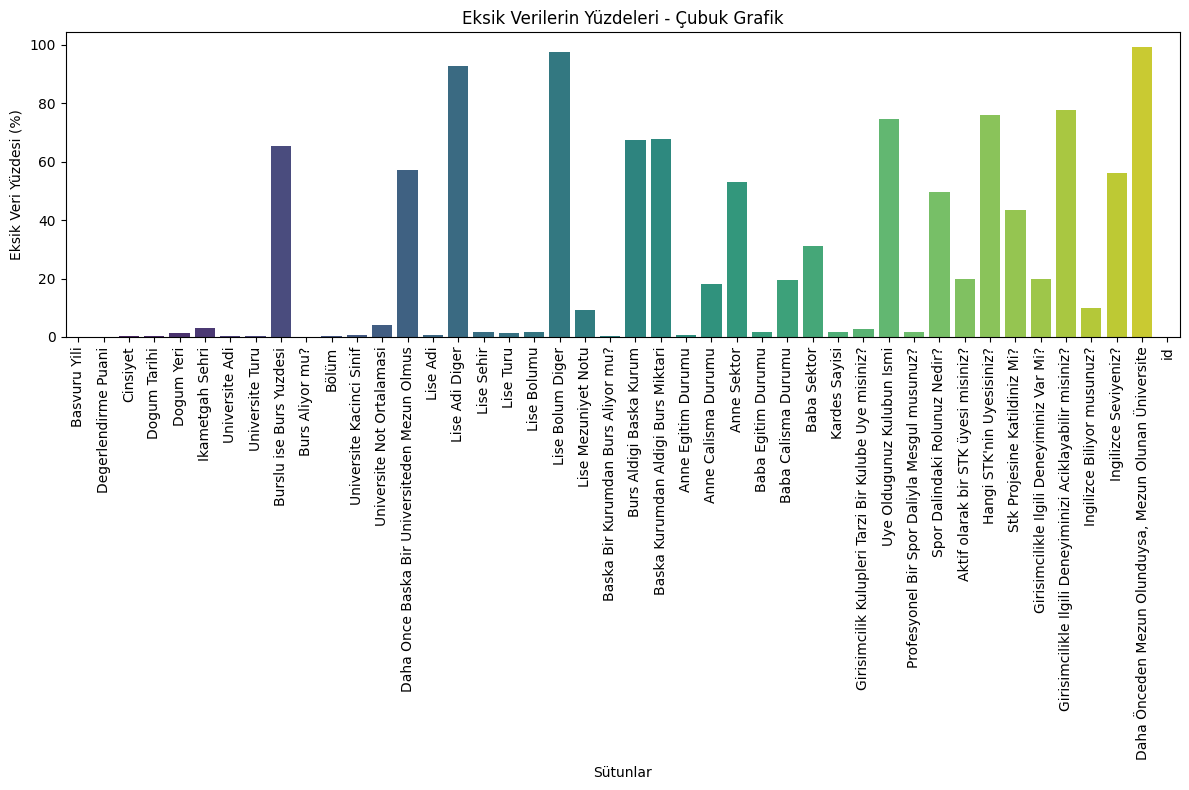

In [8]:
df_analyzer.plot_missing_percentage_bar()

In [9]:
categorical_train_columns = train_df.select_dtypes(include=['object', 'category']).columns
numerical_train_columns = train_df.select_dtypes(include=['number',"int","float"]).columns
categorical_test_columns = test_df.select_dtypes(include=['object', 'category']).columns
numerical_test_columns = test_df.select_dtypes(include=['number']).columns

## Aykırı Değerlerin analizi

In [10]:
class OutlierDetector:
    def __init__(self, data):
        self.df = pd.DataFrame(data)
        self.z_scores = {}
        self.outliers = {}

    def calculate_z_scores(self):
        # Her sütun için Z-Score hesaplama
        for column in self.df.columns:
            self.z_scores[column] = stats.zscore(self.df[column])
            self.outliers[column] = np.abs(self.z_scores[column]) > 3

    def plot_data(self):
        if not self.outliers:
            raise ValueError("Z-Scores hesaplanmadı. Önce `calculate_z_scores` metodunu çağırın.")
        
        # Seaborn stilini ve renk paletini ayarlama
        sns.set(style="whitegrid")
        palette = sns.color_palette("husl", n_colors=len(self.df.columns))

        # Her sütun için Box Plot ve Violin Plot oluşturma
        num_columns = len(self.df.columns)
        fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(15, 5 * num_columns))
        
        for i, column in enumerate(self.df.columns):
            # Box Plot
            sns.boxplot(data=self.df[column], ax=axes[i, 0], palette=[palette[i]])
            axes[i, 0].set_title(f'Box Plot - {column}')
            axes[i, 0].set_xlabel('')
            axes[i, 0].set_ylabel('')

            # Violin Plot
            sns.violinplot(data=self.df[column], ax=axes[i, 1], palette=[palette[i]])
            axes[i, 1].set_title(f'Violin Plot - {column}')
            axes[i, 1].set_xlabel('')
            axes[i, 1].set_ylabel('')

        plt.tight_layout()
        plt.show()

    def remove_outliers(self):
        if not self.outliers:
            raise ValueError("Z-Scores hesaplanmadı. Önce `calculate_z_scores` metodunu çağırın.")
        
        # Aykırı değerleri her sütundan çıkarma
        for column in self.df.columns:
            self.df = self.df[~self.outliers[column]]

    def cap_outliers(self):
        if not self.outliers:
            raise ValueError("Z-Scores hesaplanmadı. Önce `calculate_z_scores` metodunu çağırın.")
        
        # Her sütun için aykırı değerleri üst sınırla değiştirme
        for column in self.df.columns:
            upper_limit = self.df[column].quantile(0.95)
            self.df[column] = np.where(self.df[column] > upper_limit, upper_limit, self.df[column])

    def log_transform(self):
        # Her sütun için log dönüşümü uygulama
        for column in self.df.columns:
            self.df[column] = np.log(self.df[column] + 1)  # +1, log(0) sorununu önler

In [11]:
detector = OutlierDetector(train_df[numerical_train_columns])

In [12]:
detector.calculate_z_scores()


In [13]:
detector.remove_outliers() 

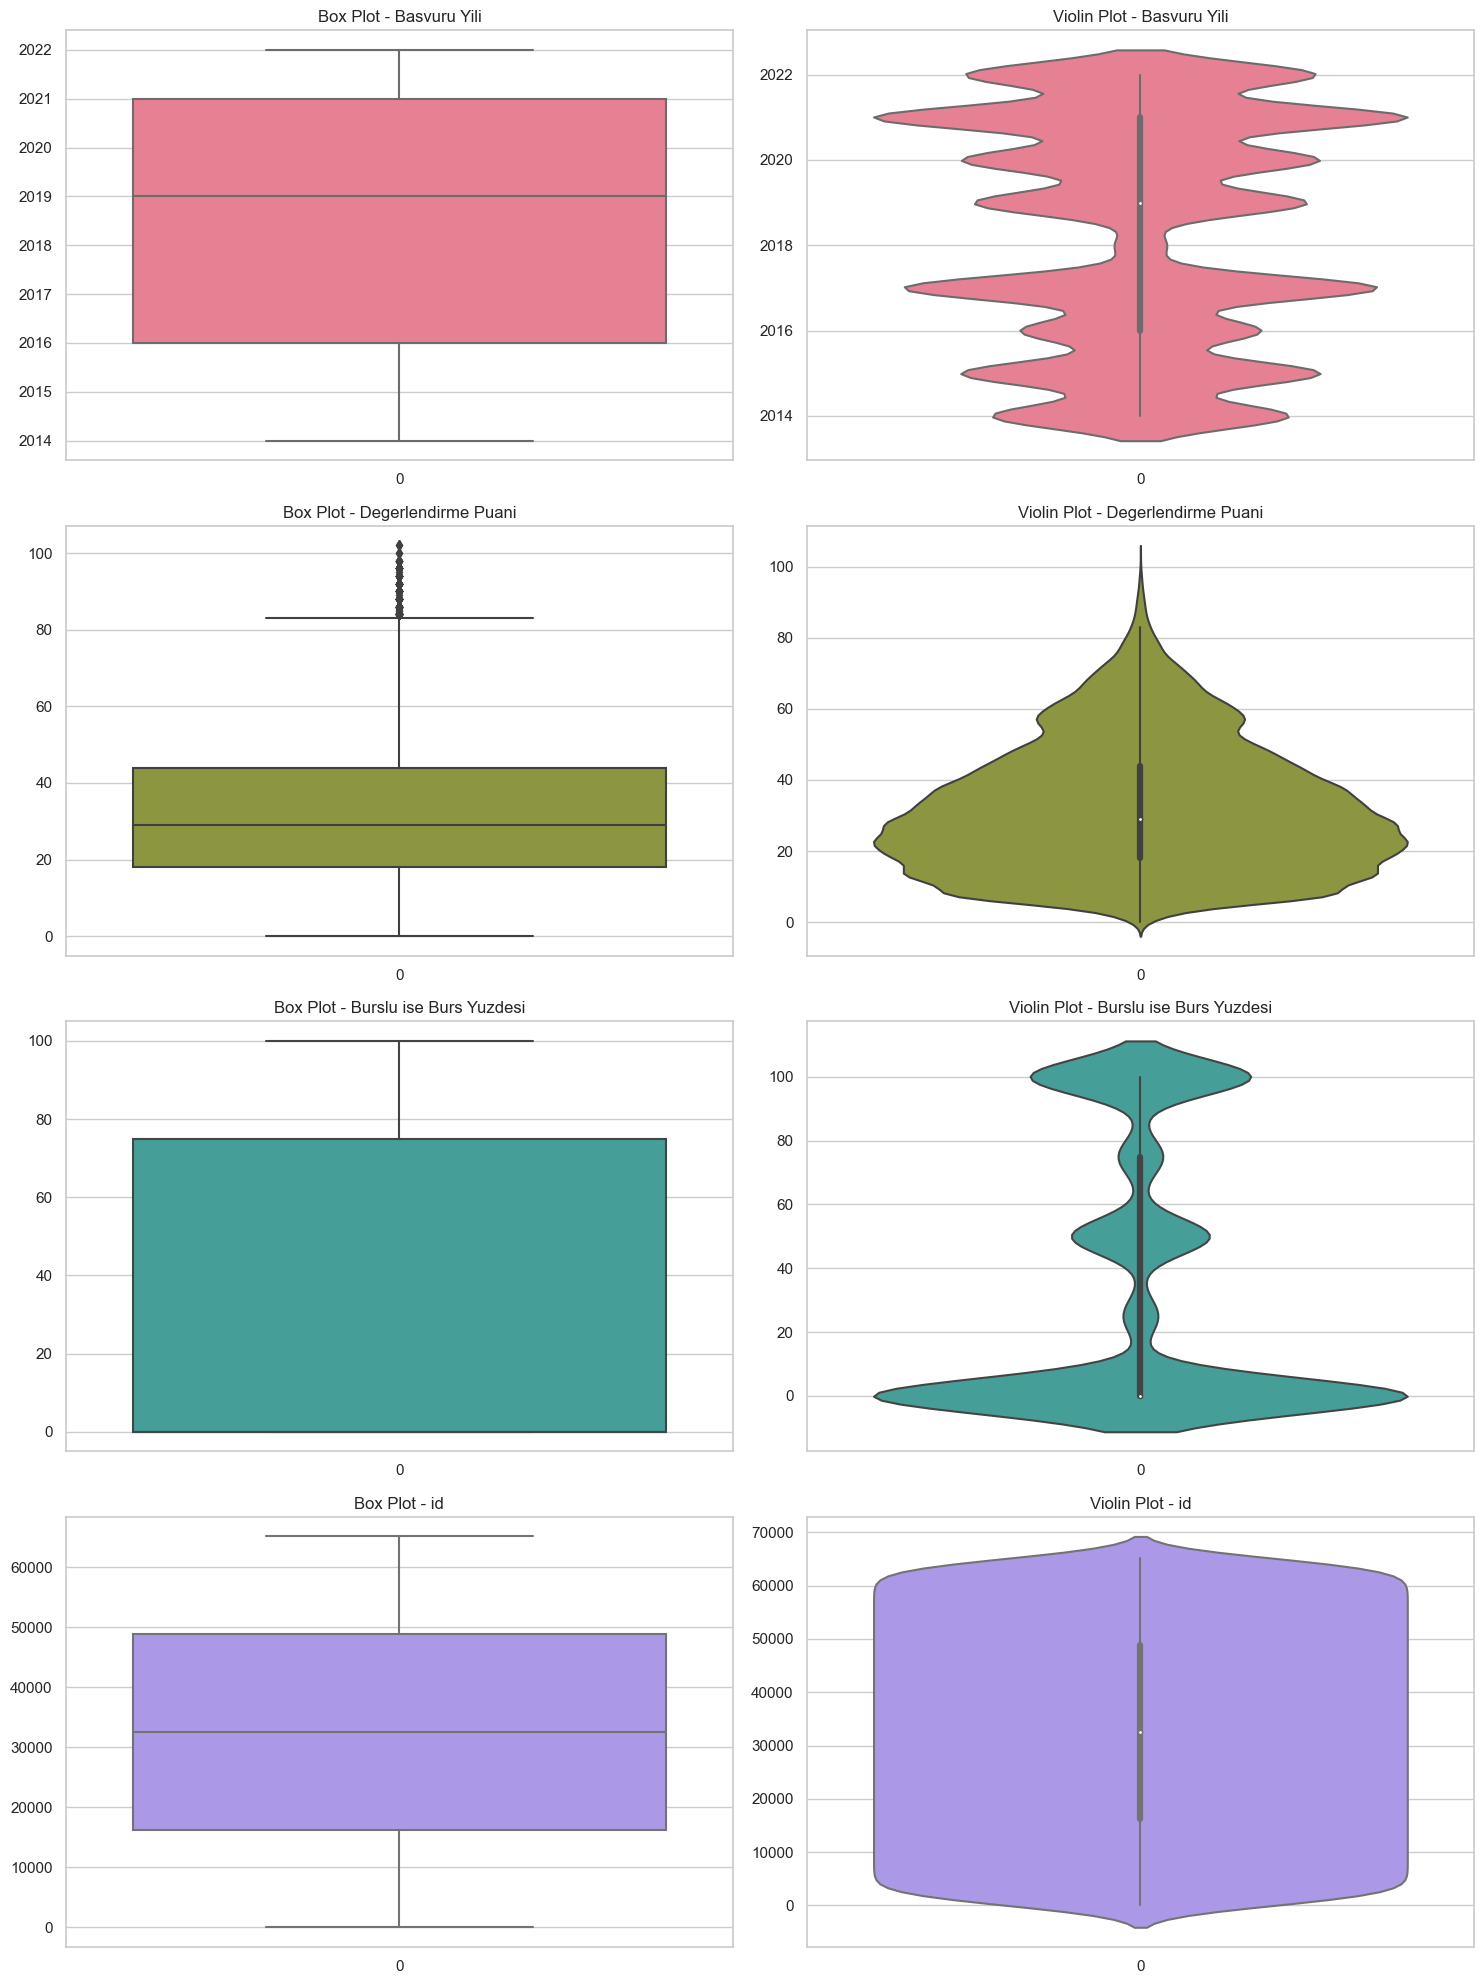

In [14]:
detector.plot_data()


## Feature Engineering

In [15]:
train_df[categorical_train_columns].columns

Index(['Cinsiyet', 'Dogum Tarihi', 'Dogum Yeri', 'Ikametgah Sehri',
       'Universite Adi', 'Universite Turu', 'Burs Aliyor mu?', 'Bölüm',
       'Universite Kacinci Sinif', 'Universite Not Ortalamasi',
       'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi',
       'Lise Adi Diger', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Lise Bolum Diger', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?', 'Burs Aldigi Baska Kurum',
       'Baska Kurumdan Aldigi Burs Miktari', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu',
       'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Uye Oldugunuz Kulubun Ismi',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       'Hangi STK'nin Uyesisiniz?', 'Stk Projesine Katildiniz Mi?',
       'Girisimcilikle Ilgili Deneyiminiz

In [47]:
le = LabelEncoder()

columns = [
        "Cinsiyet",
        'Universite Kacinci Sinif', 
        'Universite Turu', 
        'Burs Aliyor mu?', 
        'Anne Egitim Durumu', 
        'Baba Egitim Durumu', 
        'Anne Sektor', 
        'Baba Sektor', 
        'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
        'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 
        'Ingilizce Biliyor musunuz?', 
        'Ingilizce Seviyeniz?',
        "Kardes Sayisi",
        "Lise Mezuniyet Notu",
        "Spor Dalindaki Rolunuz Nedir?",
        "Profesyonel Bir Spor Daliyla Mesgul musunuz?",
        "Aktif olarak bir STK üyesi misiniz?",
        "Stk Projesine Katildiniz Mi?",
        "Universite Not Ortalamasi",
        "Daha Once Baska Bir Universiteden Mezun Olmus"
    ]

def labelEncoder(df,columns):
    
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df


In [17]:
#Cinsiyet Veri Temizleme
def standardize_gender(df, column_name):
    gender_mapping = {
        'erkek': 'Erkek',
        'kadın': 'Kadın',
        'belirtmek istemiyorum': 'Belirtmek İstemiyorum'
    }

    def map_gender(gender):
        gender_cleaned = str(gender).strip().lower()  
        return gender_mapping.get(gender_cleaned, 'Belirtmek İstemiyorum') 

    df[column_name] = df[column_name].apply(map_gender)
    
    return df

train_df = standardize_gender(train_df, 'Cinsiyet')


In [18]:
#Burs Aliyor mu Veri Temizleme
def standardize_scholarship(df, column_name):
    scholarship_mapping = {
        'evet': 'Evet',
        'hayır': 'Hayır'
    }

    def map_scholarship(status):
        status_cleaned = str(status).strip().lower()  
        return scholarship_mapping.get(status_cleaned, 'Hayır')  

    df[column_name] = df[column_name].apply(map_scholarship)
    
    return df
train_df = standardize_scholarship(train_df, 'Burs Aliyor mu?')


In [19]:
#Universite Turu Veri Temizleme
def standardize_university_type(df, column_name):
    university_type_mapping = {
        'özel': 'Özel',
        'devlet': 'Devlet'
    }

    def map_university_type(uni_type):
        if pd.isna(uni_type):  
            return 'Bilinmiyor'  
        uni_type_cleaned = str(uni_type).strip().lower()  
        return university_type_mapping.get(uni_type_cleaned, 'Bilinmiyor')  

    df[column_name] = df[column_name].apply(map_university_type)
    
    return df
train_df = standardize_university_type(train_df, 'Universite Turu')


In [20]:
#Ingilizce Biliyor musunuz?
def standardize_english_proficiency(df, column_name):
    english_mapping = {
        'evet': 'Evet',
        'hayır': 'Hayır'
    }

    def map_english_status(status):
        if pd.isna(status):  
            return 'Hayır'  
        status_cleaned = str(status).strip().lower()  
        return english_mapping.get(status_cleaned, 'Hayır')  

    # Kolonu dönüştür
    df[column_name] = df[column_name].apply(map_english_status)
    
    return df

train_df = standardize_english_proficiency(train_df, 'Ingilizce Biliyor musunuz?')


In [21]:
#Ingilizce Seviyesi Veri Temizleme
import pandas as pd

def standardize_english_level(df, column_name):
    english_level_mapping = {
        'ileri': 'İleri',
        'orta': 'Orta',
        'başlangıç': 'Başlangıç',
        '0': 'Yok',
        'nan': 'Yok'
    }

    def map_english_level(level):
        if pd.isna(level):  
            return 'Yok'  
        level_cleaned = str(level).strip().lower()  
        return english_level_mapping.get(level_cleaned, 'Yok') 

    df[column_name] = df[column_name].apply(map_english_level)
    
    return df

train_df = standardize_english_level(train_df, 'Ingilizce Seviyeniz?')


In [22]:
def standardize_university_class(df, column_name):
    class_mapping = {
        'hazırlık': 0, 'Hazırlık': 0, '0': 0, '1': 1, '2': 2, '3': 3, 
        '4': 4, '5': 5, '6': 6, 'Mezun': 7, 'Yüksek Lisans': 8, 'Tez': 9
    }
    
    def map_university_class(class_value):
        if pd.isna(class_value): 
            return -1 
        class_value_cleaned = str(class_value).strip()
        return class_mapping.get(class_value_cleaned, -1) 
    
    df[column_name] = df[column_name].apply(map_university_class).astype(int)
    
    return df

train_df = standardize_university_class(train_df, 'Universite Kacinci Sinif')

In [23]:
# Üniversite Notları Veri Temizleme

def standardize_not_ortalama_uni(df, column_name):
    # Not ortalamasını temsil eden değerler için bir harita
    range_mapping = {
        '2.50 ve altı': '2.5 ve altı',
        '2.5-3.0': '2.5-3.0',
        '3.0-3.5': '3.0-3.5',
        '3.5-4.0': '3.5-4.0',
        '3.00 - 4.00': '3.5-4.0',
        '3.50 - 4.00': '3.5-4.0',
        '3.00 - 3.50': '3.0-3.5',
        '2.50 - 3.00': '2.5-3.0',
        '4-3.5': '3.5-4.0',
        '2.00 - 2.50': '2.5 ve altı',
        '1.00 - 2.50': '2.5 ve altı',
        '4.0-3.5': '3.5-4.0',
        '3.00 - 3.49': '3.0-3.5',
        '2.50 - 2.99': '2.5-3.0',
        '1.80 - 2.49': '2.5 ve altı',
        '0 - 1.79': '2.5 ve altı'
    }
    
    def map_not_ortalama(value):
        if pd.isna(value) or value in ['Ortalama bulunmuyor', 'ORTALAMA BULUNMUYOR', 'Not ortalaması yok', 'Hazırlığım']:
            return '2.5 ve altı'
        value = str(value).strip()
        return range_mapping.get(value, '2.5 ve altı')
    
    df[column_name] = df[column_name].apply(map_not_ortalama)
    
    return df
train_df = standardize_not_ortalama_uni(train_df,"Universite Not Ortalamasi")


In [24]:
#Kardeş Sayısı Gruplandırma
def convert_to_siblings_count(df, column_name):
    # Kardeş Sayısı sütununu sayısal değerlere dönüştür
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    
    # Kategorilere ayırma
    def categorize_siblings_count(value):
        if pd.isna(value) or value < 0:
            return '0'
        elif value < 1:
            return '0'
        elif value < 3:
            return '1-2'
        elif value < 7:
            return '3-6'
        else:
            return '7+'
    
    df[column_name] = df[column_name].apply(categorize_siblings_count)
    
    return df

# Fonksiyonu uygulama
train_df = convert_to_siblings_count(train_df, "Kardes Sayisi")

# Kategori isimlerini kontrol etme
print(train_df["Kardes Sayisi"].unique())


    

['1-2' '3-6' '7+' '0']


In [25]:
# Lise Notları Veri Temizleme

'''  
   UNIQUES :
   Lise Mezuniyet Notu : 
 [ ''   '' ''
 nan '69-55' '100-85' '84-70' '54-45' '44-0' '75 - 100' '50 - 75'
 'Not ortalaması yok' '25 - 50' '0 - 25' '50 - 74' '25 - 49' '0 - 24']   
'''

def standardize_not_ortalama_lise(df, column_name):
    a = "85-100"
    b = "70-84"
    c = "55-69"
    d = "25-55"
    e = "0-24"    

    range_mapping = {
        '2.50 ve altı':e,
        '3.00-2.50': c,
        '3.50-3': b,
        '3.5-4.0': a,
        '3.00 - 4.00':a,
        '4.00-3.50':a,
        '3.50-3.00': b,
        '69-55': c,
        '100-85': a,
        '84-70': b,
        '54-45': d,
        '44-0': e,
        '75 - 100':a,
        '50 - 75': c,
        'Not ortalaması yok': e,
        '25 - 50': d,
        '0 - 25': e,
        '50 - 74':c ,
        '25 - 49': c,
        '0 - 24': e
    }
    
    def map_not_ortalama(value):
        if pd.isna(value) or value in ['Ortalama bulunmuyor', 'ORTALAMA BULUNMUYOR', 'Not ortalaması yok', 'Hazırlığım']:
            return e
        value = str(value).strip()
        return range_mapping.get(value,e)
    
    df[column_name] = df[column_name].apply(map_not_ortalama)
    
    return df
train_df = standardize_not_ortalama_lise(train_df,"Lise Mezuniyet Notu")


In [26]:
# Anne ve Baba Eğitim Durumu Veri Temizleme
def standardize_education_status(df, column_name):
    mapping = {
        'üniversite mezunu': 'Üniversite Mezunu',
        'üniversite': 'Üniversite Mezunu',
        'yüksek lisans / doktora': 'Yüksek Lisans / Doktora',
        'yüksek lisans / doktara': 'Yüksek Lisans / Doktora',
        'yüksek lisans': 'Yüksek Lisans / Doktora',
        'doktora': 'Yüksek Lisans / Doktora',
        'ilkokul mezunu': 'İlkokul Mezunu',
        'ilkokul': 'İlkokul Mezunu',
        'lise mezunu': 'Lise Mezunu',
        'lise': 'Lise Mezunu',
        'ortaokul mezunu': 'Ortaokul Mezunu',
        'ortaokul': 'Ortaokul Mezunu',
        'eğitim yok': 'Eğitim Yok',
        'eğitimi yok': 'Eğitim Yok',
        '0': 'Diğer',
        '-': 'Diğer'
    }

    def map_status(status):
        status_cleaned = str(status).strip().lower()  
        return mapping.get(status_cleaned, 'Diğer') 

    df[column_name] = df[column_name].apply(map_status)
    
    return df
train_df = standardize_education_status(train_df, 'Anne Egitim Durumu')
train_df = standardize_education_status(train_df, 'Baba Egitim Durumu')

print(train_df["Anne Egitim Durumu"].unique())
print(train_df["Baba Egitim Durumu"].unique())


['Üniversite Mezunu' 'Diğer' 'Eğitim Yok' 'Lise Mezunu' 'Ortaokul Mezunu'
 'Yüksek Lisans / Doktora']
['Üniversite Mezunu' 'Yüksek Lisans / Doktora' 'Diğer' 'Ortaokul Mezunu'
 'Lise Mezunu' 'Eğitim Yok']


In [27]:
# Sektör Veri Temizleme
def standardize_sector(df, column_name):
    mapping = {
        'özel sektör': 'Özel Sektör',
        'kamu': 'Kamu',
        'diğer': 'Diğer',
        '': 'Diğer',
        '-': 'Diğer',
        '0': 'Diğer',
        'diger': 'Diğer'  
    }

    def map_sector(sector):
        sector_cleaned = str(sector).strip().lower() 
        return mapping.get(sector_cleaned, 'Diğer') 

    df[column_name] = df[column_name].apply(map_sector)
    
    return df

train_df = standardize_sector(train_df, 'Baba Sektor')
train_df = standardize_sector(train_df, 'Anne Sektor')


In [28]:
# Spor Dalı Rolleri Veri Temizleme
def standardize_role(df, column_name):
    mapping = {
        'kaptan': 'Kaptan',
        'lider/kaptan': 'Kaptan',
        'kaptan / lider': 'Kaptan',
        'bireysel': 'Bireysel',
        'takım oyuncusu': 'Takım Oyuncusu',
        '': 'Diğer',
        '-': 'Diğer',
        'diğer': 'Diğer',
        'diger': 'Diğer',
        '0': 'Diğer'
    }

    def map_role(role):
        role_cleaned = str(role).strip().lower()  
        return mapping.get(role_cleaned, 'Diğer')  

    df[column_name] = df[column_name].apply(map_role)
    
    return df

df = standardize_role(train_df, 'Spor Dalindaki Rolunuz Nedir?')


In [29]:
train_df["Dogum Tarihi"].unique()

array(['4/6/1994', '6/11/1993', '1/15/1986', ..., '10.04.2003 00:00',
       '13.12.1997 00:00', '12.11.2003 00:00'], dtype=object)

In [30]:
# Tarih formatlarını dönüştürme fonksiyonu
def parse_date(date_str):
    formats = [
        '%m/%d/%Y',            # Örneğin: 4/6/1994
        '%d/%m/%Y',            # Örneğin: 06/11/1993
        '%Y-%m-%d',            # Örneğin: 1994-06-15
        '%d.%m.%Y %H:%M',      # Örneğin: 10.04.2003 00:00
        '%d %B %Y',            # Örneğin: 15 Mart 1990
        '%d %B %Y',            # Örneğin: 1 Ocak 2020
        '%Y/%m/%d',            # Örneğin: 1986/01/15
        '%Y-%m-%dT%H:%M:%S',  # Örneğin: 2020-12-31T23:59:59
        '%d-%m-%Y',            # Örneğin: 31-12-2020
        '%d-%m-%Y %H:%M',      # Örneğin: 31-12-2020 23:59
        '%d %B %Y',            # Örneğin: 31 December 2020
        '%B %d, %Y'            # Örneğin: December 31, 2020
    ]
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt, errors='raise')
        except ValueError:
            continue
    
    return pd.NaT

# Tarih sütununu dönüştürme
train_df['Dogum Tarihi'] = train_df['Dogum Tarihi'].apply(parse_date)

# Yaş hesaplama
def calculate_age(birth_date, application_year):
    if pd.notna(birth_date):
        return application_year - birth_date.year
    else:
        return None

# Basvuru Yili sütununda yıl bilgilerini içermesi gerektiğini varsayalım
train_df['Yaş'] = train_df.apply(lambda row: calculate_age(row['Dogum Tarihi'], row['Basvuru Yili']), axis=1)

# Medyan yaş hesaplama ve NaN değerlerle doldurma
median_age = train_df['Yaş'].median()
train_df['Yaş'] = train_df['Yaş'].fillna(median_age)

print(train_df[['Dogum Tarihi', 'Basvuru Yili', 'Yaş']])

      Dogum Tarihi  Basvuru Yili   Yaş
0       1994-04-06          2014  20.0
1       1993-06-11          2014  21.0
2       1986-01-15          2014  28.0
3       1991-06-04          2014  23.0
4              NaT          2014  21.0
...            ...           ...   ...
65120   2003-06-18          2022  19.0
65121   2002-04-18          2022  20.0
65122   1999-10-23          2022  23.0
65123   2000-11-17          2022  22.0
65124   2000-04-27          2022  22.0

[65125 rows x 3 columns]


In [31]:
train_df["Yaş"].isnull().sum()

0

In [32]:
def fill_na_with_no(df, columns):
    for column in columns:
        if column in df.columns:
            df[column].fillna('Hayır', inplace=True)
        else:
            print(f"Uyarı: '{column}' sütunu veri çerçevesinde bulunamadı.")
    
    return df

columns_to_fill = [
    'Aktif olarak bir STK üyesi misiniz?',
    'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
    'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
    'Baba Calisma Durumu',
    'Anne Calisma Durumu',
    'Baska Bir Kurumdan Burs Aliyor mu?',
    'Daha Once Baska Bir Universiteden Mezun Olmus',
    "Stk Projesine Katildiniz Mi?",
    "Girisimcilikle Ilgili Deneyiminiz Var Mi?" 
]

train_df = fill_na_with_no(train_df, columns_to_fill)



C:\Users\bedir\AppData\Local\Temp\ipykernel_18492\1523027536.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Hayır', inplace=True)


In [33]:
train_df = labelEncoder(train_df,columns)

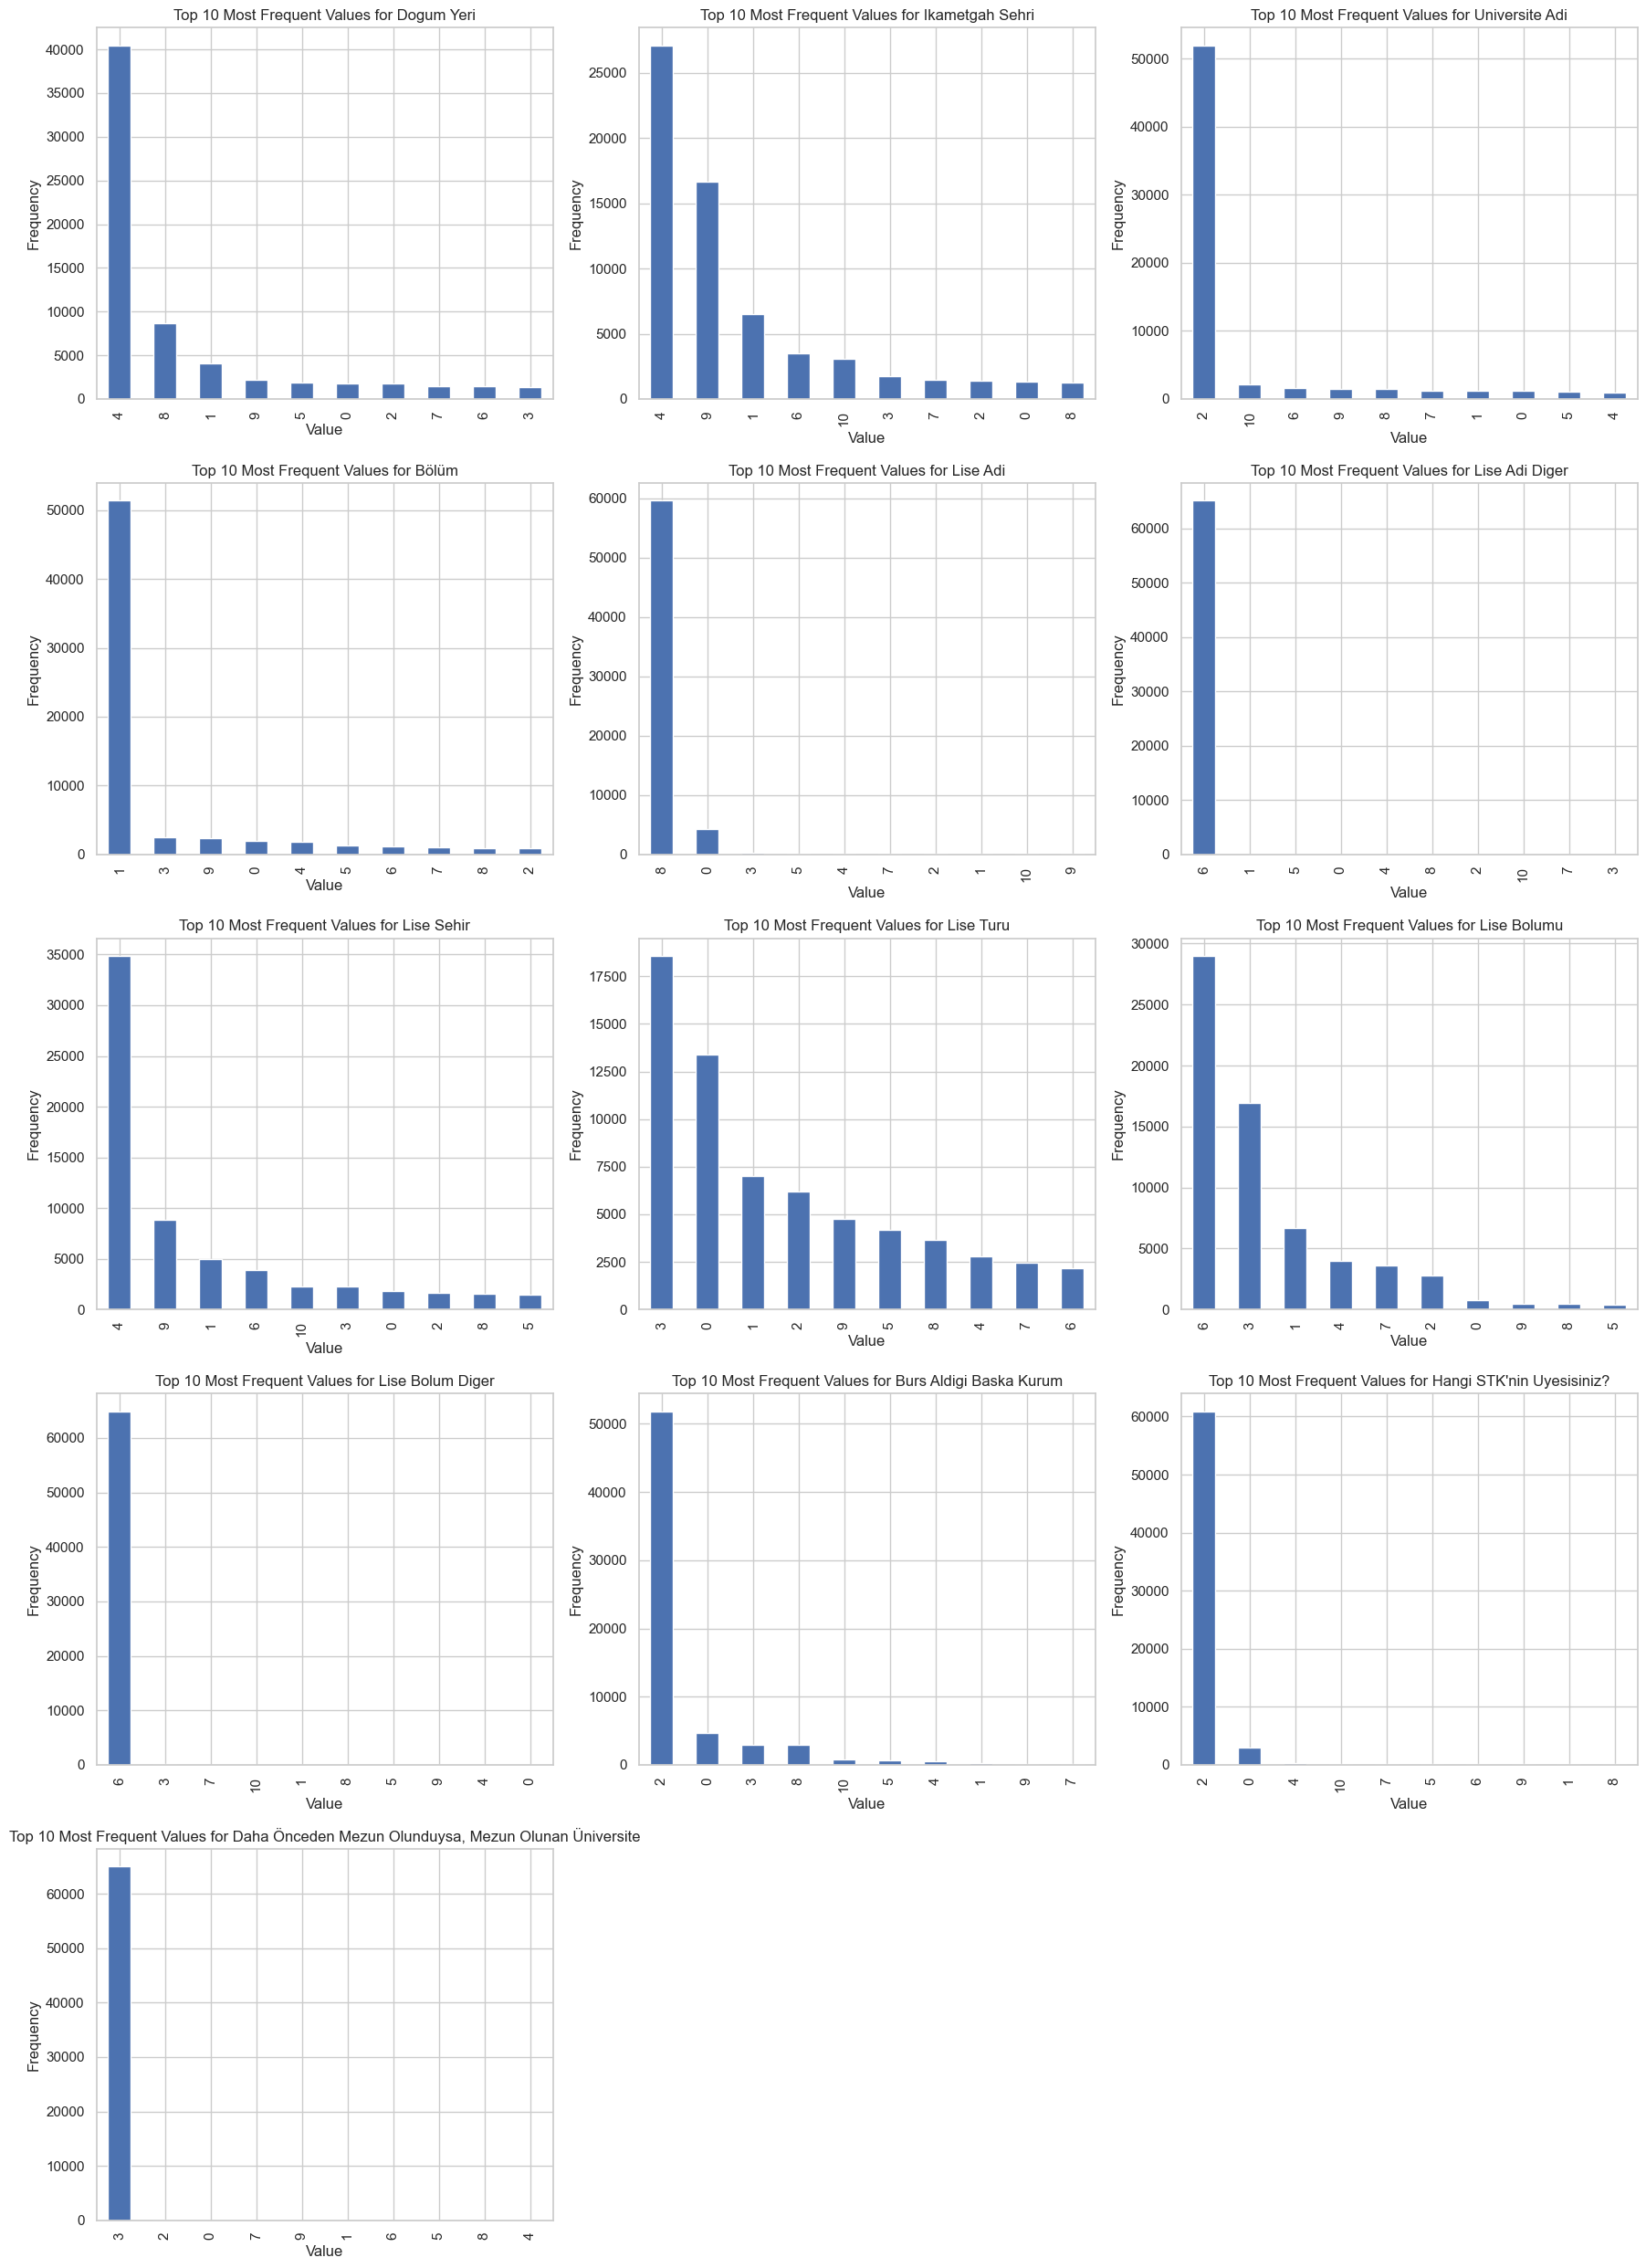

In [53]:
import math
def plot_top_frequent_values(df, categorical_columns, top_n=10):
    """
    Plot the top N most frequent values for each categorical column in the DataFrame using subplots.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    categorical_columns (list): List of column names to plot.
    top_n (int): Number of top frequent values to display.
    """
    num_columns = 3  # Number of subplots per row
    num_plots = len(categorical_columns)  # Total number of plots
    num_rows = math.ceil(num_plots / num_columns)  # Calculate the number of rows needed

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))
    axes = axes.flatten()  # Flatten to make indexing easier

    for i, column in enumerate(categorical_columns):
        if column in df.columns:
            # Count the frequency of each unique value in the column
            value_counts = df[column].value_counts()

            # Select the top N most frequent values
            top_values = value_counts.head(top_n)

            # Plotting
            top_values.plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'Top {top_n} Most Frequent Values for {column}')
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


other_categorical_columns = [ 'Dogum Yeri', 'Ikametgah Sehri',
       'Universite Adi','Bölüm',
       'Lise Adi',
       'Lise Adi Diger', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Lise Bolum Diger', 'Burs Aldigi Baska Kurum',
       "Hangi STK'nin Uyesisiniz?",
       'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite']

plot_top_frequent_values(train_df, other_categorical_columns)



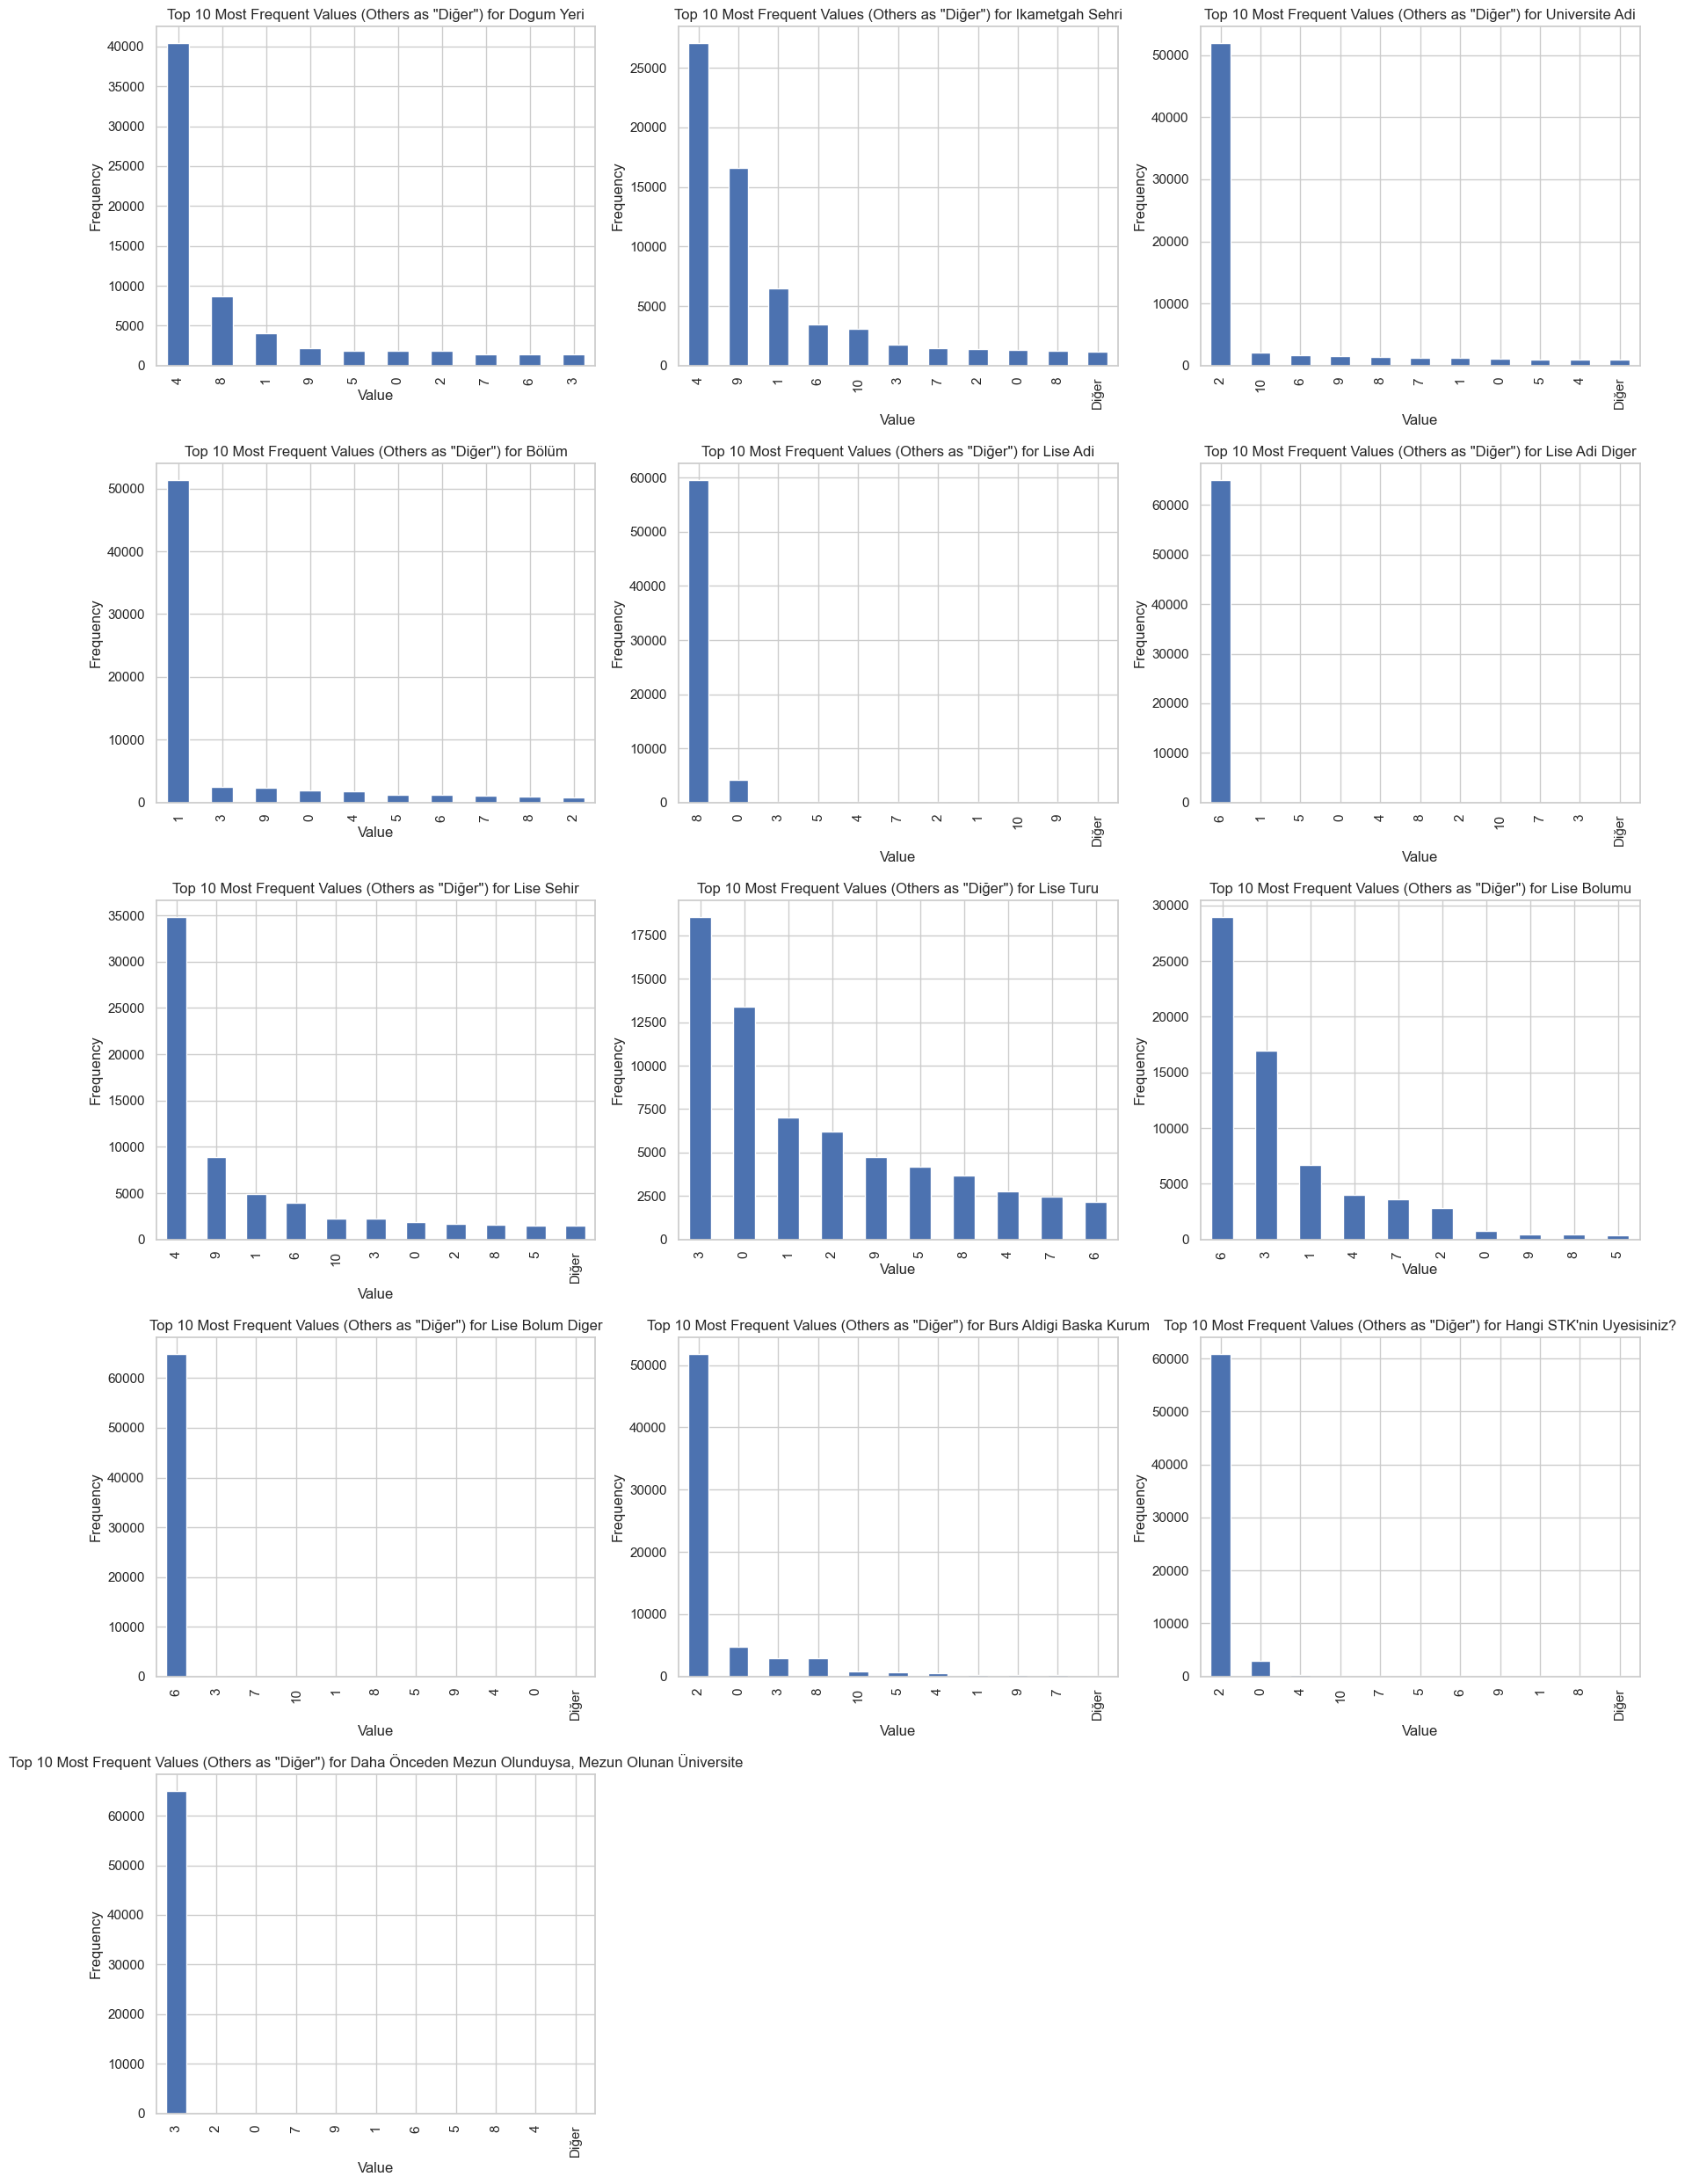

In [54]:
def plot_top_10_frequent_values_categorized(df, categorical_columns):
    num_columns = 3  # Number of subplots per row
    num_plots = len(categorical_columns)  # Total number of plots
    num_rows = math.ceil(num_plots / num_columns)  # Calculate the number of rows needed

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))
    axes = axes.flatten()  # Flatten to make indexing easier

    for i, column in enumerate(categorical_columns):
        if column in df.columns:
            # Count the frequency of each unique value in the column
            value_counts = df[column].value_counts()
            
            # Identify the top 10 most frequent values
            top_10_values = value_counts.head(10).index
            
            # Replace all other values with 'Diğer'
            df[column] = df[column].apply(lambda x: x if x in top_10_values else 'Diğer')
            
            # Count the frequency again after categorizing
            categorized_counts = df[column].value_counts()
            
            # Plotting
            categorized_counts.plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'Top 10 Most Frequent Values (Others as "Diğer") for {column}')
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    return df
train_df = plot_top_10_frequent_values_categorized(train_df, other_categorical_columns)


In [48]:
labelEncoder(train_df,other_categorical_columns)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id,Yaş
0,2014,52.0,1,1994-04-06,4,1,2,2,100.0,0,...,1,2,0,1,NaN,1,2,3,0,20.0
1,2014,30.0,1,1993-06-11,4,9,2,2,100.0,1,...,1,2,0,0,Bilkent Cyberparkta bir şirkette Türkiye nin i...,1,2,3,1,21.0
2,2014,18.0,1,1986-01-15,4,9,2,2,100.0,1,...,1,2,1,1,NaN,1,2,3,2,28.0
3,2014,40.0,1,1991-06-04,3,9,2,2,100.0,0,...,1,2,0,1,NaN,1,2,3,3,23.0
4,2014,24.0,1,NaT,4,1,2,2,100.0,0,...,1,2,1,1,NaN,1,2,3,4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,2022,0.0,1,2003-06-18,8,9,2,2,NaN,0,...,1,0,1,1,-,1,2,3,65120,19.0
65121,2022,0.0,1,2002-04-18,4,4,2,1,NaN,1,...,1,0,1,1,-,1,2,3,65121,20.0
65122,2022,0.0,1,1999-10-23,7,4,2,1,NaN,1,...,1,0,1,1,-,1,2,3,65122,23.0
65123,2022,0.0,1,2000-11-17,4,4,2,1,NaN,1,...,1,0,1,1,-,1,2,3,65123,22.0


# EDA

## Kategorik Verilere İlişkin Grafikler

Korelasyon Matrisi :



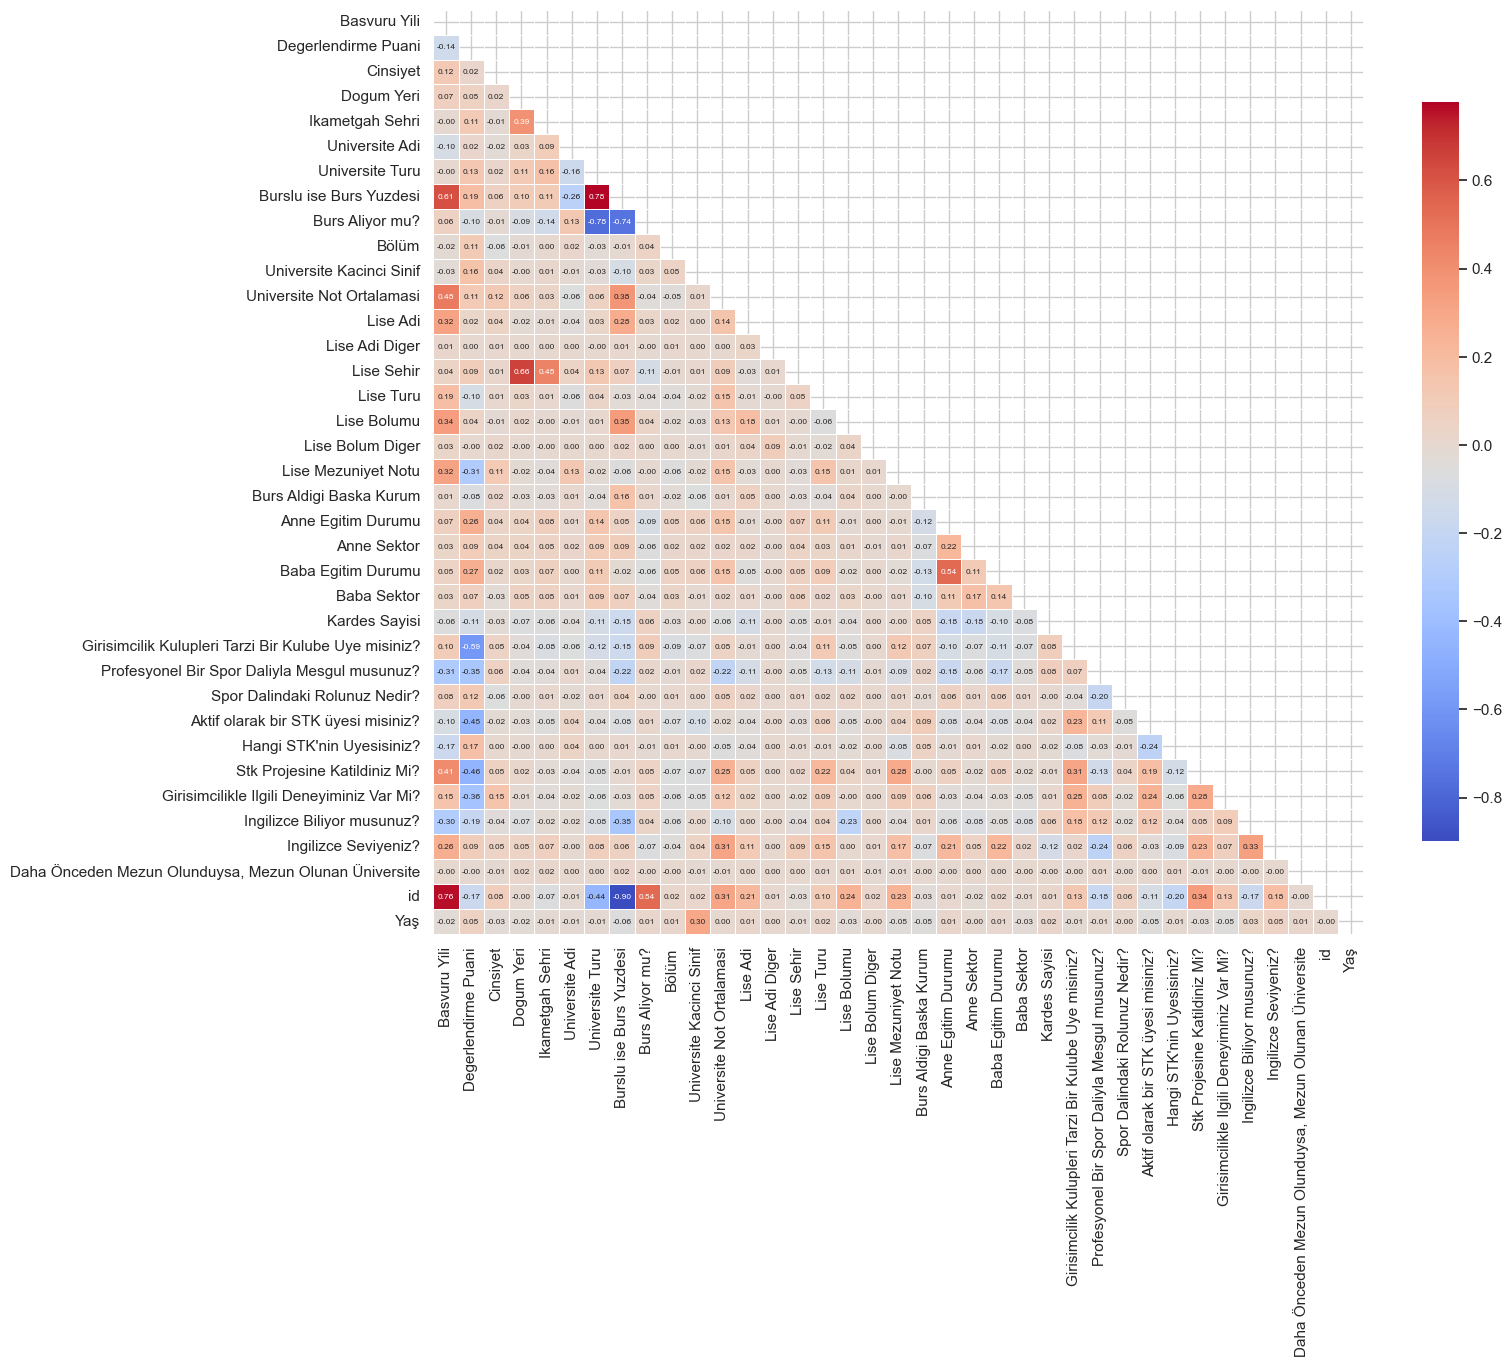

In [51]:
df_analyzer = DfAnalyzer(train_df)
df_analyzer.plot_correlation_matrix()

In [ ]:
for col in train_df.columns:
    print(f"{col} : \n {train_df[col].unique()}\n")

c:\Users\bedir\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bedir\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bedir\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bedir\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

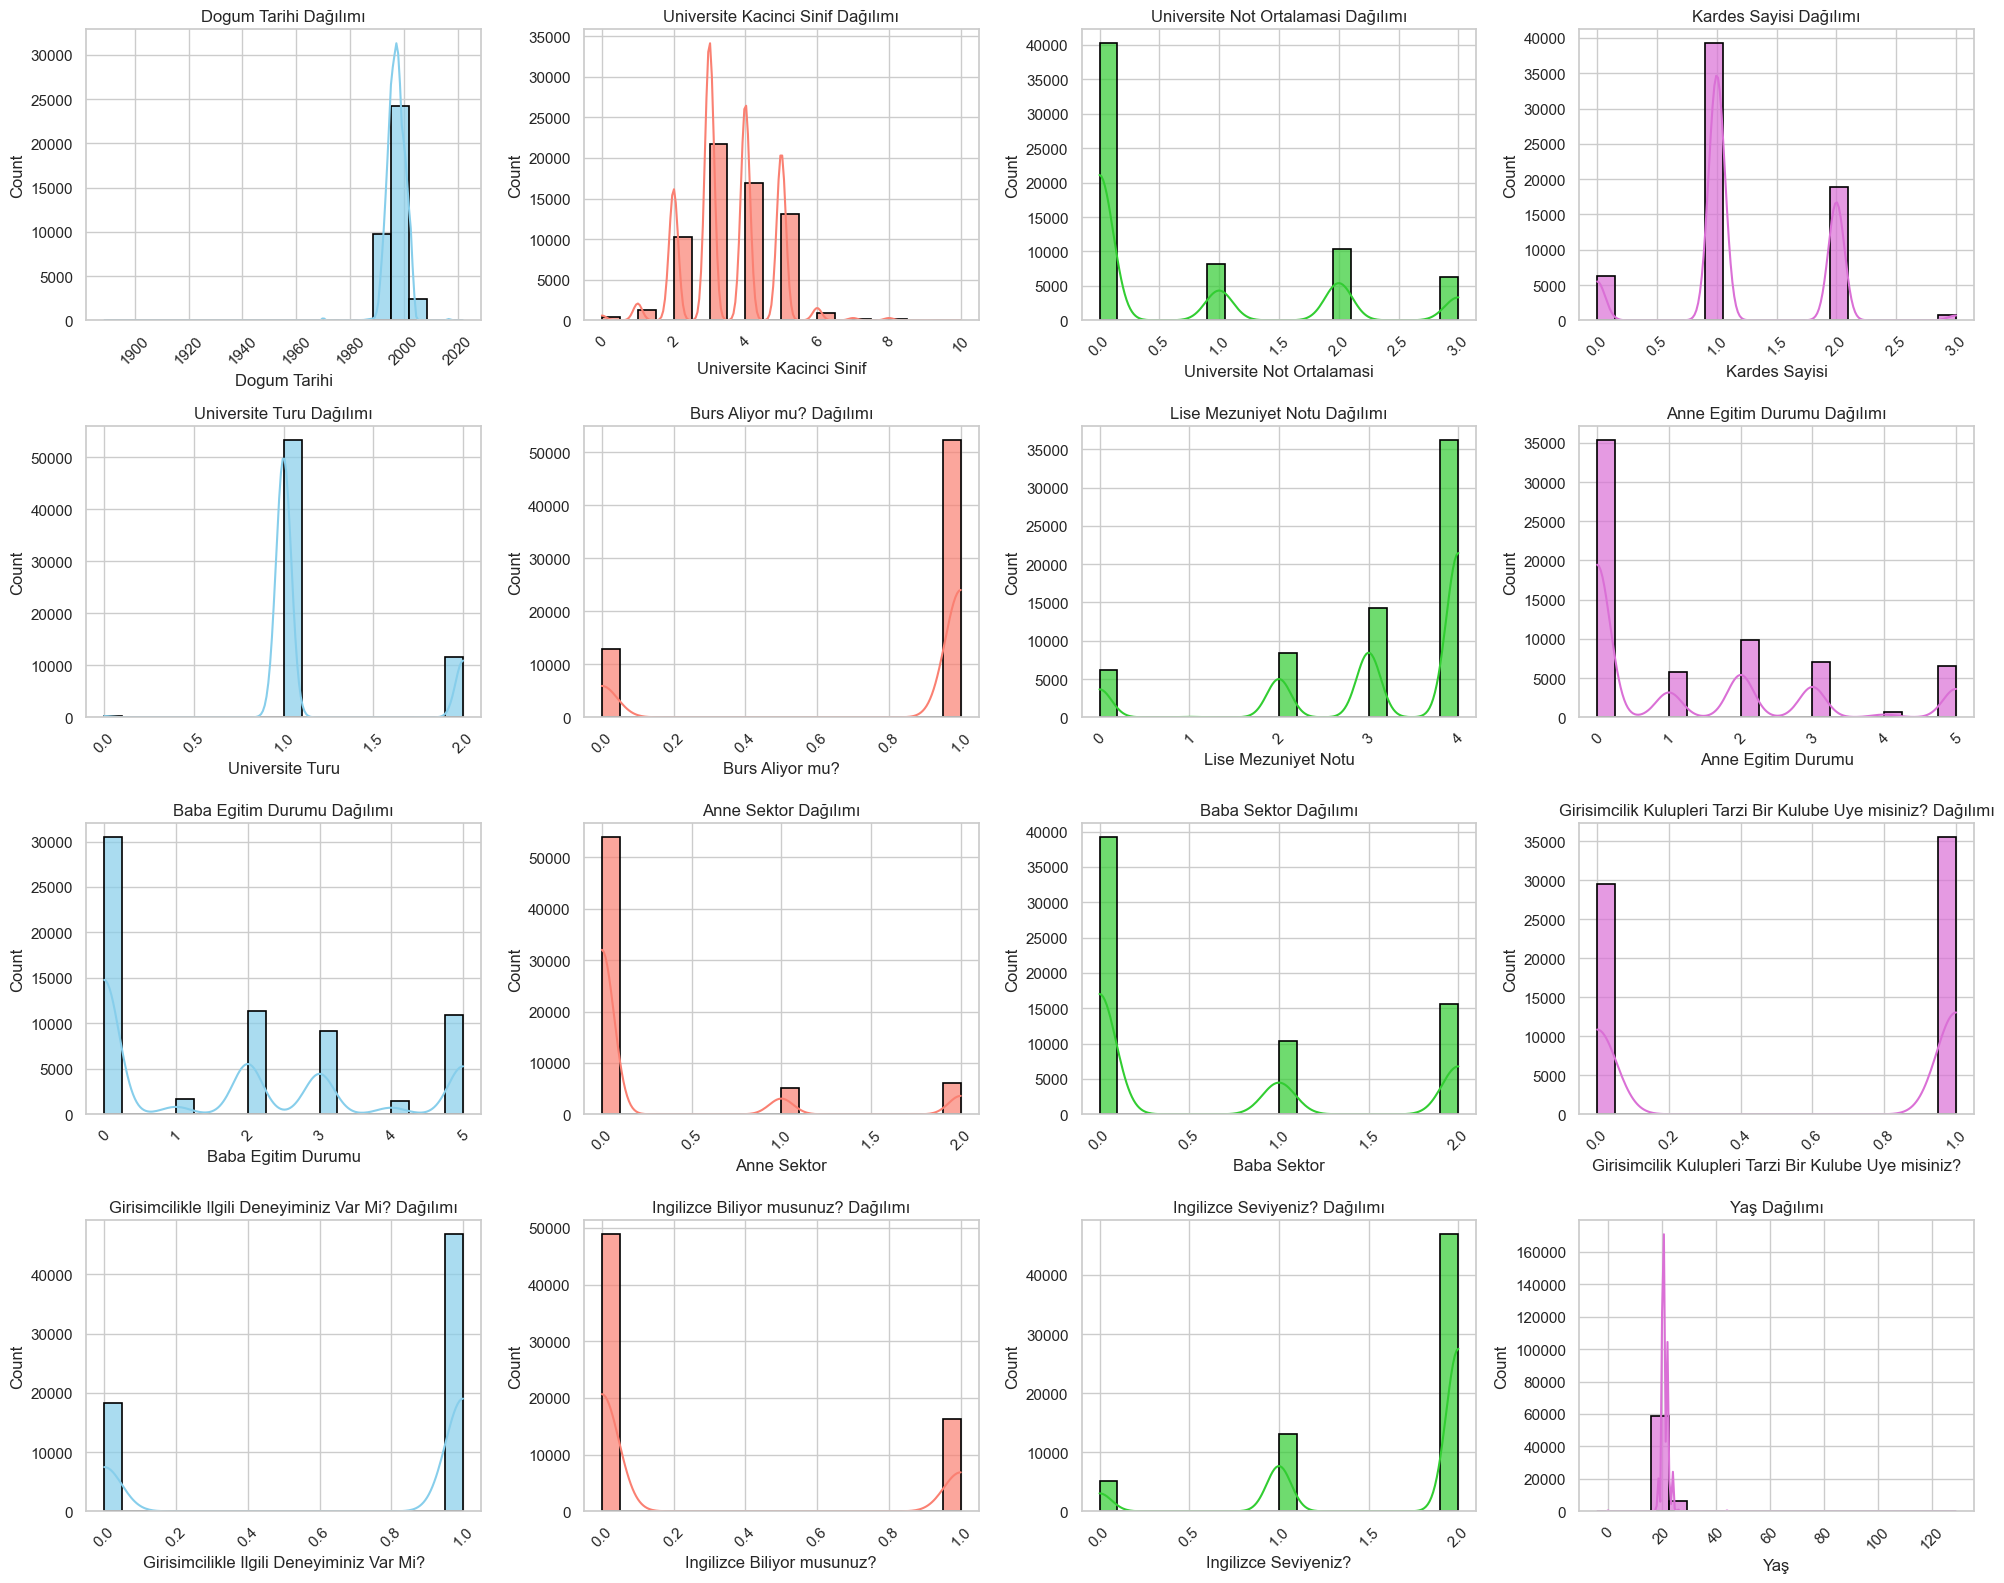

In [37]:
df = train_df

# Sütun isimleri ve renkleri
columns = [
    'Dogum Tarihi', 
    'Universite Kacinci Sinif', 
    'Universite Not Ortalamasi', 
    'Kardes Sayisi', 
    'Universite Turu', 
    'Burs Aliyor mu?', 
    'Lise Mezuniyet Notu', 
    'Anne Egitim Durumu', 
    'Baba Egitim Durumu', 
    'Anne Sektor', 
    'Baba Sektor', 
    'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
    'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 
    'Ingilizce Biliyor musunuz?', 
    'Ingilizce Seviyeniz?', 
    'Yaş'
]

colors = [
    'skyblue', 
    'salmon', 
    'limegreen', 
    'orchid', 
    'skyblue', 
    'salmon', 
    'limegreen', 
    'orchid', 
    'skyblue', 
    'salmon', 
    'limegreen', 
    'orchid', 
    'skyblue', 
    'salmon', 
    'limegreen', 
    'orchid'
]

fig, axes = plt.subplots(4, 4, figsize=(20, 16))

for ax, column, color in zip(axes.flat, columns, colors):
    if df[column].dtype == 'object':
        sns.histplot(df[column].dropna(), bins=len(df[column].unique()), ax=ax, kde=False, color=color, edgecolor='black', alpha=0.7, linewidth=1.2)
    else:
        sns.histplot(df[column].dropna(), bins=20, ax=ax, kde=True, color=color, edgecolor='black', alpha=0.7, linewidth=1.2)
    
    ax.set_title(f'{column} Dağılımı')

for ax in axes.flat:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

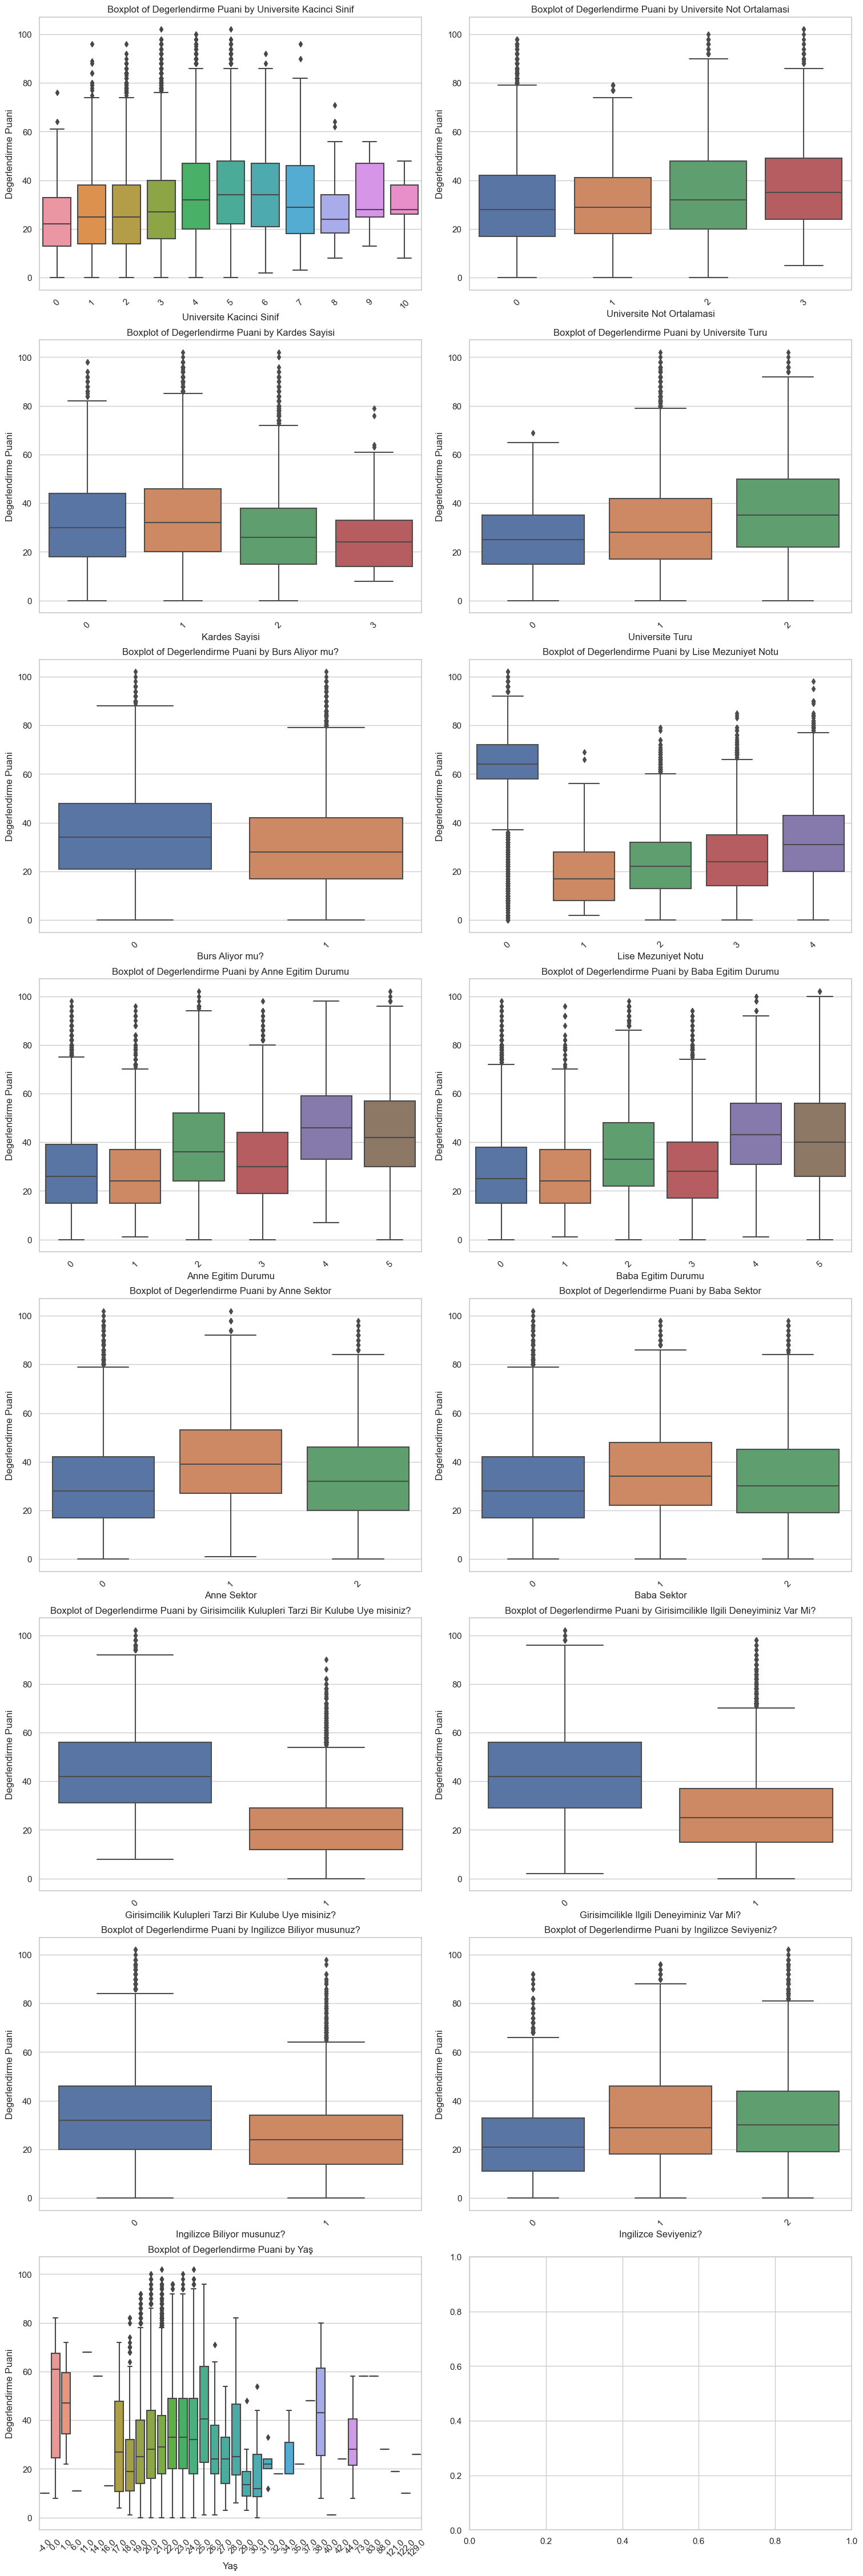

In [38]:
def plot_boxplots(df, target_column):
    columns = [
    'Universite Kacinci Sinif', 
    'Universite Not Ortalamasi', 
    'Kardes Sayisi', 
    'Universite Turu', 
    'Burs Aliyor mu?', 
    'Lise Mezuniyet Notu', 
    'Anne Egitim Durumu', 
    'Baba Egitim Durumu', 
    'Anne Sektor', 
    'Baba Sektor', 
    'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
    'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 
    'Ingilizce Biliyor musunuz?', 
    'Ingilizce Seviyeniz?', 
    'Yaş'
]
    
    num_plots = len(columns)

    # Subplot sayısını belirleme
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, num_plots * 3), constrained_layout=True)
    axes = axes.flatten()

    # Her kategorik değişken için bir boxplot çizme
    for i, column in enumerate(columns):
        sns.boxplot(x=column, y=target_column, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {target_column} by {column}')
        axes[i].tick_params(axis='x', rotation=45)

    plt.show()

plot_boxplots(train_df,"Degerlendirme Puani")

C:\Users\bedir\AppData\Local\Temp\ipykernel_18492\622690657.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y=target_column, data=df, ci=None, ax=axes[i])
C:\Users\bedir\AppData\Local\Temp\ipykernel_18492\622690657.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y=target_column, data=df, ci=None, ax=axes[i])
C:\Users\bedir\AppData\Local\Temp\ipykernel_18492\622690657.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y=target_column, data=df, ci=None, ax=axes[i])
C:\Users\bedir\AppData\Local\Temp\ipykernel_18492\622690657.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y=target_column, data=df, ci=None, ax=axes[i])
C:\Users\bedir\AppData\Local\Temp\ipykernel_18492\622690657.py:28: FutureWar

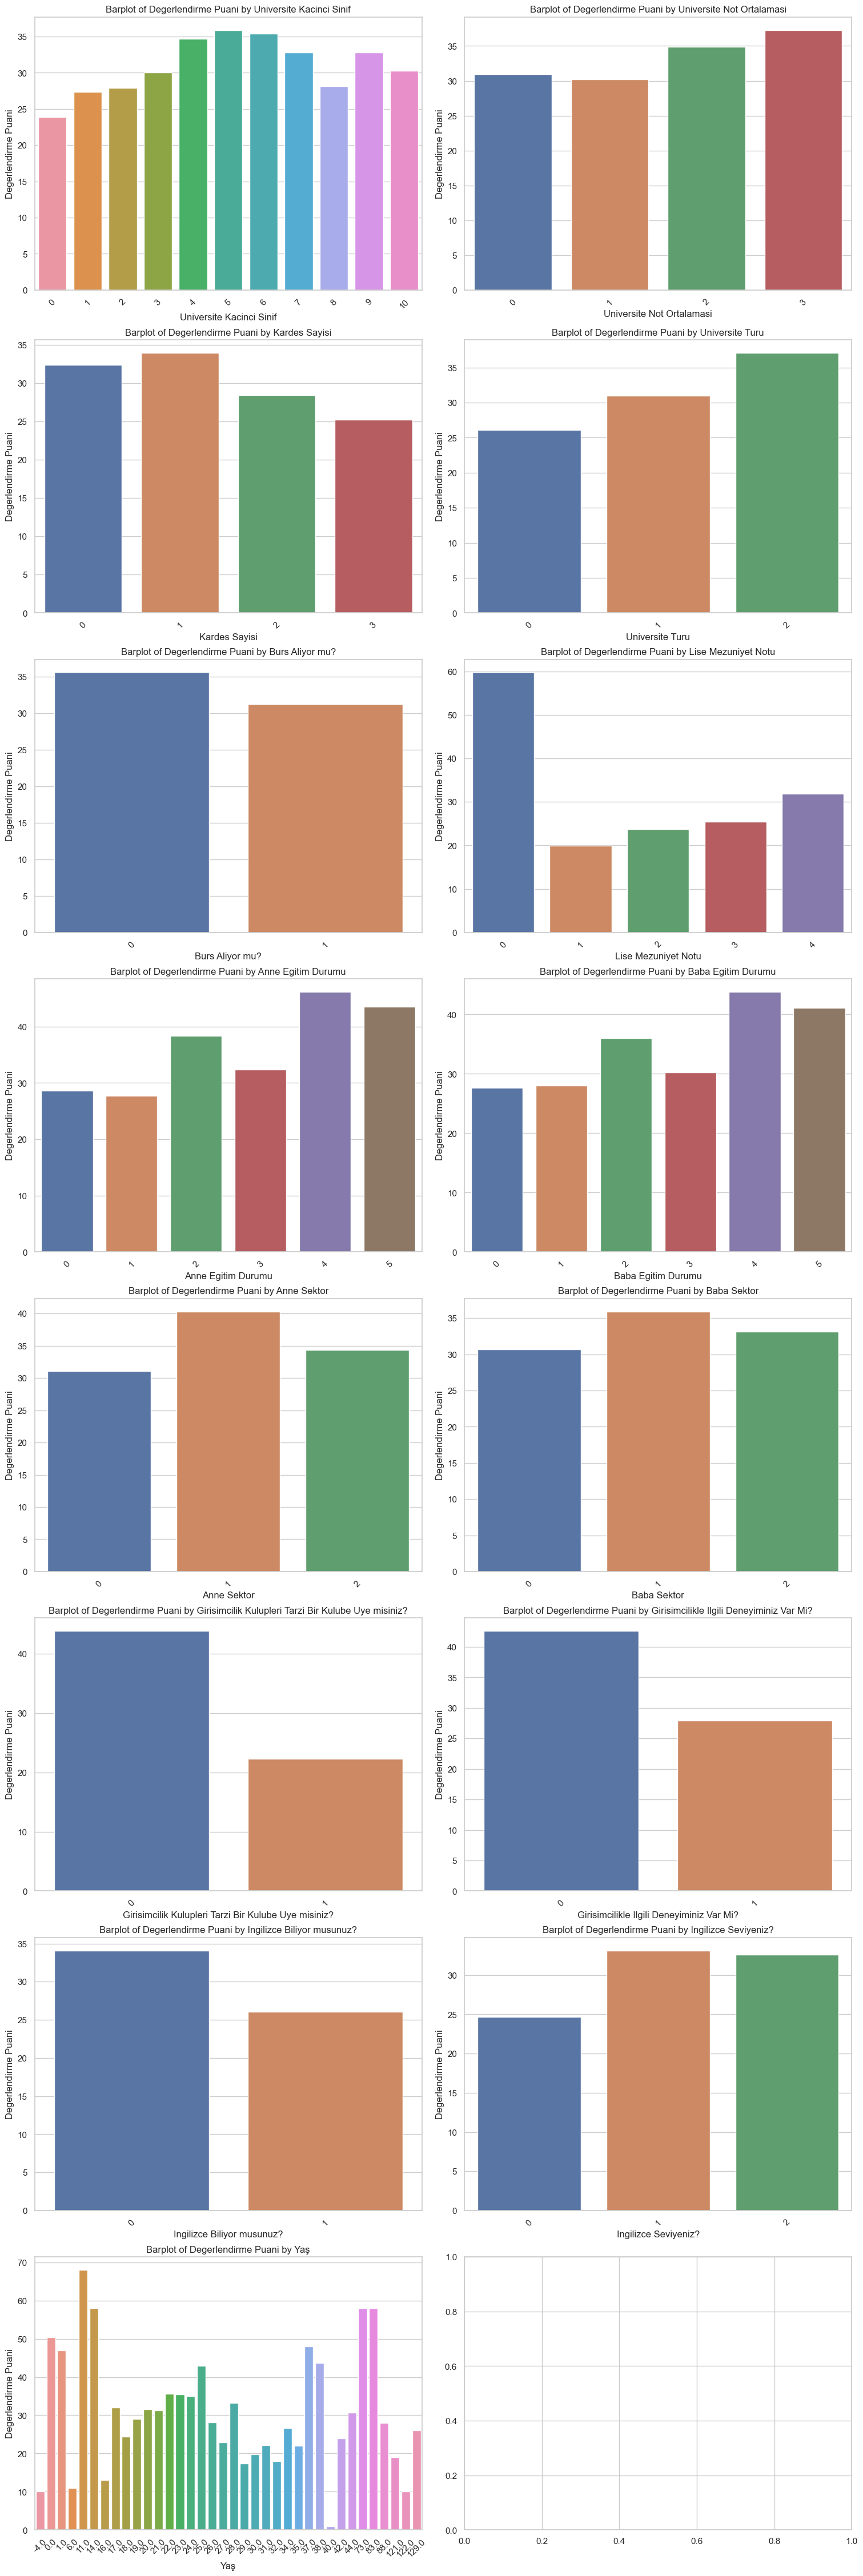

In [39]:
def plot_barplots(df, target_column):
    columns = [
    'Universite Kacinci Sinif', 
    'Universite Not Ortalamasi', 
    'Kardes Sayisi', 
    'Universite Turu', 
    'Burs Aliyor mu?', 
    'Lise Mezuniyet Notu', 
    'Anne Egitim Durumu', 
    'Baba Egitim Durumu', 
    'Anne Sektor', 
    'Baba Sektor', 
    'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
    'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 
    'Ingilizce Biliyor musunuz?', 
    'Ingilizce Seviyeniz?', 
    'Yaş'
]
    # Kategorik değişkenleri seçme
    num_plots = len(columns)

    # Subplot sayısını belirleme
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, num_plots * 3), constrained_layout=True)
    axes = axes.flatten()

    # Her kategorik değişken için bir barplot çizme
    for i, column in enumerate(columns):
        sns.barplot(x=column, y=target_column, data=df, ci=None, ax=axes[i])
        axes[i].set_title(f'Barplot of {target_column} by {column}')
        axes[i].tick_params(axis='x', rotation=45)

    plt.show()

plot_barplots(train_df, 'Degerlendirme Puani')

# ANOVA - T Testi

In [40]:
import scipy.stats as stats

def analyze_with_tests(df, target_column):
    """
    Bu fonksiyon, verilen DataFrame'deki kesikli değişkenlerin 'target_column' ile olan ilişkisini T-testi veya ANOVA testi ile analiz eder
    ve sonuçları görselleştirir.
    
    Parameters:
    df (pd.DataFrame): Veri çerçevesi.
    target_column (str): Sürekli değişken (örneğin, 'Değerlendirme Puanı').

    Returns:
    pd.DataFrame: Test sonuçlarını içeren bir DataFrame.
    """
    # Kategorik sütunları seç
    categorical_columns = [
        'Universite Kacinci Sinif', 
        'Universite Turu', 
        'Burs Aliyor mu?', 
        'Anne Egitim Durumu', 
        'Baba Egitim Durumu', 
        'Anne Sektor', 
        'Baba Sektor', 
        'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
        'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 
        'Ingilizce Biliyor musunuz?', 
        'Ingilizce Seviyeniz?'
    ]
    
    results = []
    
    for column in categorical_columns:
        if column in df.columns:
            # Kategorilere ayır ve 'Değerlendirme Puanı' değerlerini al
            groups = [df[df[column] == category][target_column].dropna() for category in df[column].unique()]
            
            if len(groups) == 2:
                # İki grup varsa T-testi uygula
                t_stat, p_val = stats.ttest_ind(groups[0], groups[1])
                test_type = 'T-Testi'
                
            elif len(groups) > 2:
                # Üç veya daha fazla grup varsa ANOVA testi uygula
                f_stat, p_val = stats.f_oneway(*groups)
                test_type = 'ANOVA'
                
            else:
                # Kategoriler yeterli değilse atla
                continue
            
            results.append({
                'Column': column,
                'Test Type': test_type,
                'Statistic': f_stat if test_type == 'ANOVA' else t_stat,
                'P-Value': p_val
            })
            
    
    # Sonuçları bir DataFrame olarak döndür
    results_df = pd.DataFrame(results)
    
    return results_df


results_df = analyze_with_tests(train_df, 'Degerlendirme Puani')
print(results_df)
     

                                               Column Test Type    Statistic  \
0                            Universite Kacinci Sinif     ANOVA   202.259452   
1                                     Universite Turu     ANOVA   556.670542   
2                                     Burs Aliyor mu?   T-Testi    24.611380   
3                                  Anne Egitim Durumu     ANOVA  1262.960645   
4                                  Baba Egitim Durumu     ANOVA  1293.287970   
5                                         Anne Sektor     ANOVA   675.782084   
6                                         Baba Sektor     ANOVA   375.296023   
7   Girisimcilik Kulupleri Tarzi Bir Kulube Uye mi...   T-Testi   187.624487   
8           Girisimcilikle Ilgili Deneyiminiz Var Mi?   T-Testi   -99.627481   
9                          Ingilizce Biliyor musunuz?   T-Testi   -50.033131   
10                               Ingilizce Seviyeniz?     ANOVA   484.896852   

          P-Value  
0    0.000000e+00  

# Testlerin Analizi
'Universite Kacinci Sinif': ANOVA testi yapılmış ve çok yüksek bir F-istatistiği ve p-değeri elde edilmiş. Bu, "Universite Kacinci Sinif" değişkeninin "Değerlendirme Puanı" üzerinde anlamlı bir etkisi olduğunu gösterir.

'Universite Turu': Yine ANOVA testi yapılmış ve p-değeri çok düşük. Bu, farklı üniversite türlerinin "Değerlendirme Puanı" üzerinde anlamlı fark yarattığını gösterir.

'Burs Aliyor mu?': T-Testi yapılmış ve p-değeri çok düşük. Bu, burs alan ve almayan gruplar arasındaki farkın anlamlı olduğunu gösterir.

'Anne Egitim Durumu': ANOVA testi yapılmış ve p-değeri çok düşük. Bu, annelerin eğitim durumlarının "Değerlendirme Puanı" üzerinde anlamlı bir etkisi olduğunu gösterir.

'Baba Egitim Durumu': ANOVA testi yapılmış ve p-değeri çok düşük. Bu, babaların eğitim durumlarının "Değerlendirme Puanı" üzerinde anlamlı bir etkisi olduğunu gösterir.

'Anne Sektor': ANOVA testi yapılmış ve p-değeri çok düşük. Bu, annelerin sektörlerinin "Değerlendirme Puanı" üzerinde anlamlı bir etkisi olduğunu gösterir.

'Baba Sektor': ANOVA testi yapılmış ve p-değeri çok düşük. Bu, babaların sektörlerinin "Değerlendirme Puanı" üzerinde anlamlı bir etkisi olduğunu gösterir.

'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?': T-Testi yapılmış ve p-değeri çok düşük. Bu, girişimcilik kulüplerine üye olan ve olmayan kişiler arasındaki farkın anlamlı olduğunu gösterir.

'Girisimcilikle Ilgili Deneyiminiz Var Mi?': T-Testi yapılmış ve p-değeri çok düşük. Bu, girişimcilik deneyimi olan ve olmayan kişiler arasındaki farkın anlamlı olduğunu gösterir.

'Ingilizce Biliyor musunuz?': T-Testi yapılmış ve p-değeri çok düşük. Bu, İngilizce bilen ve bilmeyen kişiler arasındaki farkın anlamlı olduğunu gösterir.

'Ingilizce Seviyeniz?': ANOVA testi yapılmış ve p-değeri çok düşük. Bu, İngilizce seviyesinin "Değerlendirme Puanı" üzerinde anlamlı bir etkisi olduğunu gösterir.